In [1]:
#PS

In [2]:
"predict the class of the flower"

'predict the class of the flower'

In [3]:
#DG

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data = iris.data, index = None, columns = iris.feature_names, dtype= None, copy = None)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
#EDA

In [11]:
"""
Presence of outliers
Distribution of data
relation between features
"""

'\nPresence of outliers\nDistribution of data\nrelation between features\n'

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


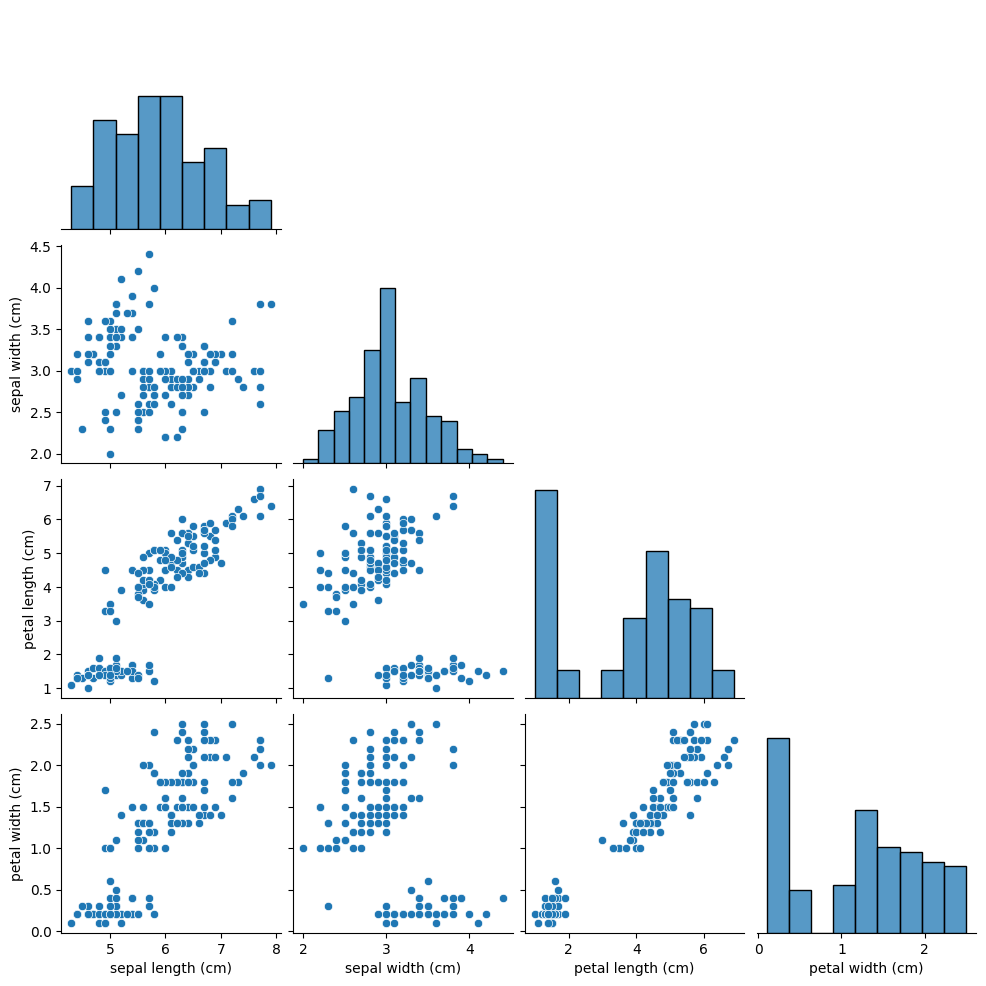

In [13]:
sns.pairplot(df,corner=True, kind = "scatter")

In [14]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [15]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [16]:
#from above corr matrix it seems that there is multicollinearity

In [17]:
#PCA - For dimensionality reduction 
"""Will do dimensions reduction after checking it as itis"""

'Will do dimensions reduction after checking it as itis'

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df

In [20]:
y = pd.DataFrame(iris.target)
type(y)

pandas.core.frame.DataFrame

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3,shuffle = True, random_state=100)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9533282488134365

In [25]:
#Lets train model by reducing the dimensions 

In [26]:
#check for the multi-collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
VIF = variance_inflation_factor

In [28]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF_value"] = [VIF(df.values, i) for i in range(df.shape[1])]
    return vif

In [29]:
features = df.iloc[:,:]
print(features.head())
calculate_vif(features)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,features,VIF_value
0,sepal length (cm),262.969348
1,sepal width (cm),96.353292
2,petal length (cm),172.960962
3,petal width (cm),55.502060


In [30]:
#from above as a rule of thumb VIF > 1.5 which shows the feature is highly correlated with each other 

In [31]:
"""Let's check the corr of independent var with dependent var """

"Let's check the corr of independent var with dependent var "

In [32]:
df["class"] = iris.target

In [33]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [35]:
#petal lnght has high corr with target varible. So, lets drop "sepal length"

In [36]:
df.drop(["sepal length (cm)","class"],axis = 1, inplace = True)

In [37]:
df

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [38]:
calculate_vif(df)

,features,VIF_value
0,sepal width (cm),5.856965
1,petal length (cm),62.071308
2,petal width (cm),43.292574


In [39]:
#still petal width has high VIF. lets check for the corr value

In [40]:
df["class"] = iris.target

In [41]:
df.corr()

,sepal width (cm),petal length (cm),petal width (cm),class
sepal width (cm),1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),-0.428440,1.000000,0.962865,0.949035
petal width (cm),-0.366126,0.962865,1.000000,0.956547
class,-0.426658,0.949035,0.956547,1.000000


In [42]:
#Petal Lenght has low corr with target value . Lets drop it.

In [43]:
df.drop(["petal length (cm)","class"], axis = 1, inplace = True)

In [44]:
calculate_vif(df)

,features,VIF_value
0,sepal width (cm),2.891774
1,petal width (cm),2.891774


In [45]:
"""So, from above we have reduced out the dimensionality along with solvingmulticollinearity issue"""

'So, from above we have reduced out the dimensionality along with solvingmulticollinearity issue'

In [46]:
#Now EDA processDone >> Lets go for Feature egineering 

In [47]:
"""Feature engineering refers to manipulation —
 addition, deletion, combination, mutation — 
 of your data set to improve machine learning model training, 
 leading to better performance and greater accuracy. 
 Effective feature engineering is based on sound knowledge of the business problem and the available data sources"""

'Feature engineering refers to manipulation —\n addition, deletion, combination, mutation — \n of your data set to improve machine learning model training, \n leading to better performance and greater accuracy. \n Effective feature engineering is based on sound knowledge of the business problem and the available data sources'

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal width (cm)  150 non-null    float64
 1   petal width (cm)  150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [49]:
#No nll valye so no imputation needed

In [50]:
x = df
y = pd.DataFrame(iris.target)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 100, shuffle = True)

In [52]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9432627838450826

In [53]:
import pickle 

with open('lr.pkl','wb') as file:
    pickle.dump(lr,file)

In [54]:
import numpy as np

In [56]:
data = lr.predict(np.array([6,.3],ndmin=2))
data

C:\Users\TEST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-0.34987569]])